# Khai Báo Thư Viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# Check Data

In [2]:
df = pd.read_csv("data.csv")
df.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


- **ID**: Mã định danh của xe  
- **Manufacturer**: Hãng sản xuất  
- **Model**: Tên dòng xe  
- **Prod. year**: Năm sản xuất  
- **Engine volume**: Dung tích động cơ  
- **Fuel type**: Loại nhiên liệu (Petrol, Diesel, Hybrid)  
- **Cylinders**: Số xi-lanh  
- **Gearbox type**: Loại hộp số (Automatic, Tiptronic, Variator)  
- **Drive wheels**: Hệ dẫn động (Front, Rear, 4x4)  
- **Leather interior**: Nội thất da (Yes/No)  
- **Doors**: Số cửa  
- **Wheel**: Vị trí vô lăng (Left/Right-hand drive)  
- **Color**: Màu xe  
- **Mileage**: Số km đã chạy  
- **Airbags**: Số lượng túi khí  
- **Levy**: Một số loại phí/thuế liên quan  


In [3]:
df.shape

(19237, 18)

In [4]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [7]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

# Phân tích dữ liệu


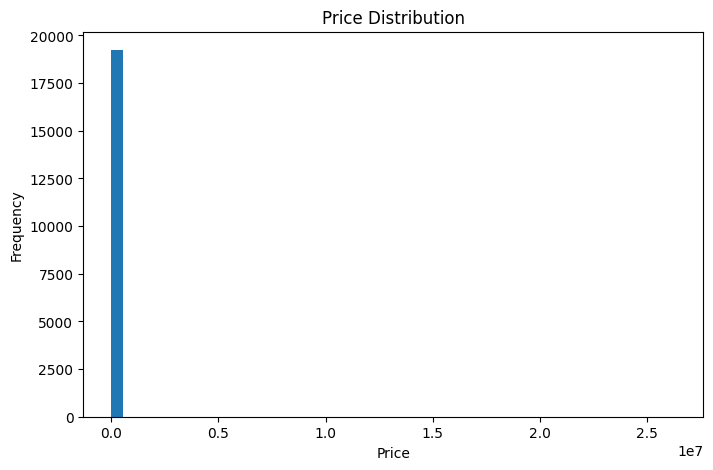

In [8]:
plt.figure(figsize=(8,5))
plt.hist(df["Price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

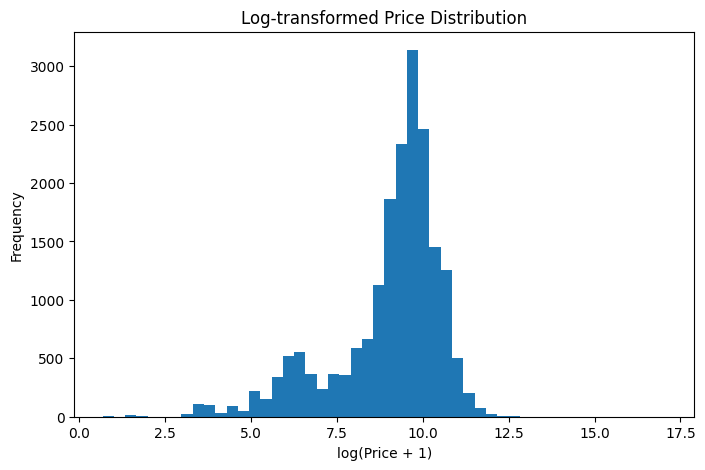

In [9]:
plt.figure(figsize=(8,5))
plt.hist(np.log1p(df["Price"]), bins=50)
plt.xlabel("log(Price + 1)")
plt.ylabel("Frequency")
plt.title("Log-transformed Price Distribution")
plt.show()


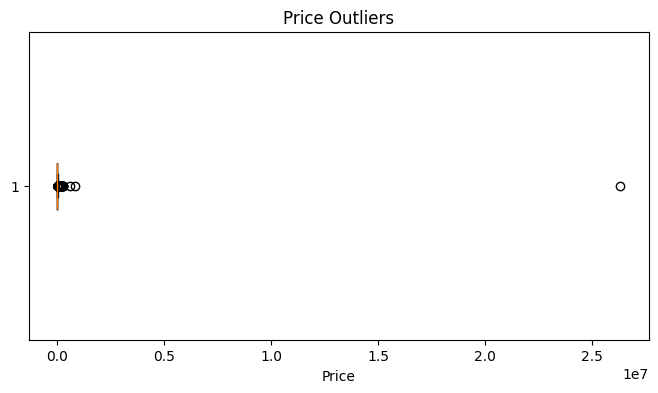

In [10]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Price"], vert=False)
plt.xlabel("Price")
plt.title("Price Outliers")
plt.show()


# Tiền Xử lý

In [11]:
# Xử lý Levy
df["Levy"] = df["Levy"].replace("-", np.nan)
df["Levy"] = df["Levy"].astype(float)
df["Levy"] = df["Levy"].fillna(df["Levy"].median())

# Feature Engineering

In [ ]:
df["Age"] = 2025 - df["Prod. year"]

In [ ]:
df["Age_bin"] = pd.cut(
    df["Age"],
    bins=[0, 5, 10, 20, 100],
    labels=["New", "Mid", "Old", "Very_Old"]
)

In [ ]:
df["Mileage"] = (
    df["Mileage"]
    .astype(str)
    .str.replace("km", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)
df["Mileage"] = pd.to_numeric(df["Mileage"], errors="coerce")
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].median())

In [ ]:
df["Mileage_bin"] = pd.cut(
    df["Mileage"],
    bins=[0, 50000, 100000, 200000, 500000],
    labels=["Low", "Medium", "High", "Very_High"]
)

In [18]:
df["Engine volume"] = (
    df["Engine volume"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.extract(r"(\d+\.?\d*)")[0]
    .astype(float)
)

In [19]:
df.loc[df["Engine volume"] > 10, "Engine volume"] /= 1000

In [20]:
df["Engine_bin"] = pd.cut(
    df["Engine volume"],
    bins=[0, 1.6, 2.0, 3.0, 10],
    labels=["Small", "Medium", "Large", "Very_Large"]
)

# Phân khúc giá

In [21]:
df["Price_segment"] = pd.cut(
    df["Price"],
    bins=[0, 10000, 25000, 50000, 100000, 1000000],
    labels=["Budget", "Economy", "Midrange", "Premium", "Luxury"]
)

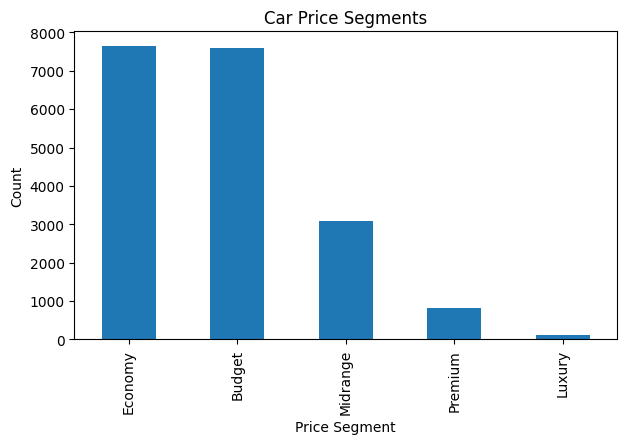

In [22]:
df["Price_segment"].value_counts().plot(kind="bar", figsize=(7,4))
plt.xlabel("Price Segment")
plt.ylabel("Count")
plt.title("Car Price Segments")
plt.show()

# Tạo dataset Train

In [23]:
y = df["Price"]
X = df.drop(columns=["Price", "Price_segment", "ID"])

In [25]:
X = df.drop(columns=["Price"])
y = df["Price"]

In [26]:
X_encoded = pd.get_dummies(
    X,
    drop_first=True
)

# Onehot coding

In [7]:
X_encoded = pd.get_dummies(X, drop_first=True)

# Cắt tỉa ngoại lai

In [ ]:
lower = y.quantile(0.01)
upper = y.quantile(0.99)
mask = (y >= lower) & (y <= upper)
X_filtered = X_encoded.loc[mask]
y_filtered = y.loc[mask]

# Train/Test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)

# Baseline trước train

In [ ]:
y_baseline = np.full_like(y_test, y_train.mean(), dtype=float)
mae_base = mean_absolute_error(y_test, y_baseline)
rmse_base = np.sqrt(mean_squared_error(y_test, y_baseline))
r2_base = r2_score(y_test, y_baseline)
mae_base, rmse_base, r2_base

(10962.837172658856, np.float64(14737.300393199099), -4.086173987838393e-06)

# Train RF

In [30]:
model = RandomForestRegressor(
    n_estimators=400,
    max_depth=25,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",400
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",25
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",3
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

# Đánh Giá

In [31]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae, rmse, r2

(2100.715439616972, np.float64(3182.7921649772916), 0.9533574309266252)

# So sánh trước sau

In [32]:
pd.DataFrame({
    "Model": ["Baseline", "Random Forest"],
    "MAE": [mae_base, mae],
    "RMSE": [rmse_base, rmse],
    "R2": [r2_base, r2]
})

,Model,MAE,RMSE,R2
0,Baseline,10962.837173,14737.300393,-0.000004
1,Random Forest,2100.715440,3182.792165,0.953357


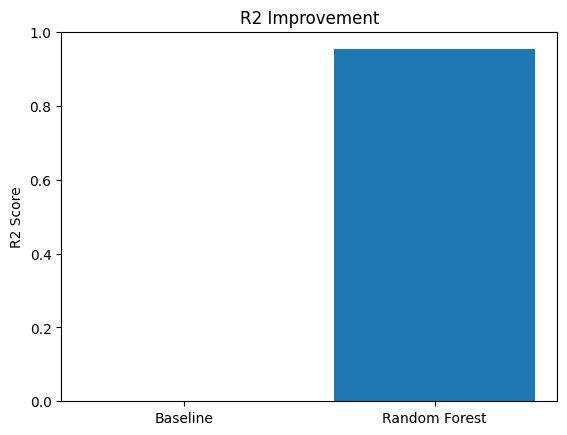

In [33]:
plt.bar(["Baseline", "Random Forest"], [r2_base, r2])
plt.ylabel("R2 Score")
plt.title("R2 Improvement")
plt.show()

# Thực tế và dự đoán

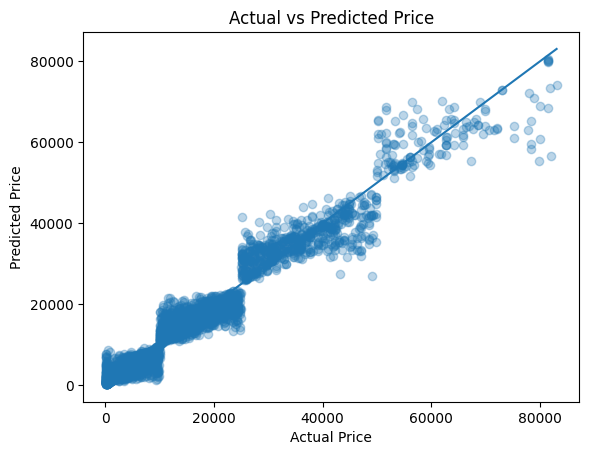

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()